In [21]:
%matplotlib inline

In [22]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

def get_data():
    data = load_svmlight_file("./australian_scale.txt")
    return data[0], data[1].reshape(len(data[1]),1)

def split_data(X,y):
    X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size=0.3)
    return X_train, X_validation, y_train, y_validation

def gradient_compute(X, y, w):
    grad = 0
    for i in range(X.shape[0]):
        v = y[i]*((w.T).dot(X[i].todense().T)[0,0])
        grad += 0 if v > 1 else -y[i]*X[i].todense()
    return grad

def loss_compute(X, y, w):
    loss = 0
    for i in range(X.shape[0]):
        v = y[i]*((w.T).dot(X[i].todense().T)[0,0])
        loss += max(0,1-v)
    return loss/X.shape[0]

def accuracy_compute(X,y,w):
    predict_value = X*w
    predict_value[predict_value > 0.5] = 1
    predict_value[predict_value < 0.5] = -1
    return np.count_nonzero(predict_value == y)/X.shape[0]



interation = 100
n = 0.0005
Interation = []
loss_train = []
loss_validation = []
accuracy_train = []
accuracy_validation = []

feature, label = get_data()
feature_train, feature_validation, label_train, label_validation = split_data(feature,label)

w = np.zeros((feature.shape[1],1))

for i in range(0,interation):
    gradient = gradient_compute(feature_train, label_train, w)
    D = -gradient
    w = w + n*D.T
    Interation.append(i)
    loss_train.append(loss_compute(feature_train, label_train, w))
    loss_validation.append(loss_compute(feature_validation, label_validation, w))
    accuracy_train.append(accuracy_compute(feature_train, label_train, w))
    accuracy_validation.append(accuracy_compute(feature_validation, label_validation, w))

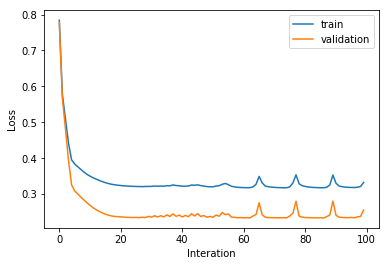

In [23]:
plt.xlabel("Interation")
plt.ylabel("Loss")
plt.plot(Interation,loss_train,label = "train")
plt.plot(Interation,loss_validation,label = "validation")
plt.legend(loc='upper right')

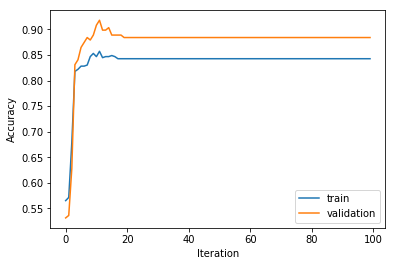

In [24]:
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(accuracy_train, label="train")
plt.plot(accuracy_validation, label="validation")
plt.legend(loc="lower right")